# TITLE

## 1. Defining the Question

## Thyroid disease is a common cause of medical diagnosis and prediction, with an onset that is difficult to forecast in medical research. The thyroid gland is one of our body's most vital organs. Thyroid hormone releases are responsible for metabolic regulation. Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid that releases thyroid hormones in regulating the rate of body's metabolism.

# Question:
### ```The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid disease or not.```


## 2) Defining the Metric for Success

### 
### 
### 

## 3) Understanding the context 

# ToolBox

<h3>Contains libraries and helper functions.</h3>

In [2]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline


# Decision Trees and Random Forest
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
# Tree visualizations
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

# ======================= CLASSIFICATION ===========================
# SVM
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
# feature selector class
# ================== UNTESTED CODE ===========================
class FeatureSelector:
    """
        Code by :Munyala Eliud

        # libraries youll need
        import numpy as np
        from sklearn.ensemble import RandomForestClassifier
        from sklearn import datasets
        from sklearn.model_selection import train_test_split
        from sklearn.feature_selection import SelectFromModel
        from sklearn.metrics import accuracy_score

        link to tut: [https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/]
        
        # input descriptions
        ```
        1. data: the data frame you are working on, should be cleaned
        2. X_set_columns:features,list of columns for the X 
        3. split_size: percent you want the data to be split by i.e 0.2,0.3..... default is 0.3
        ```

    
    """


    def __init__(self,data,X_set_columns,y_set_columns,split_size=0.3):
        self.data = data
        self.X_set_columns = X_set_columns
        self.y_set_columns = y_set_columns
        self.split_size = split_size

    
    def split_data(self):
        X = self.data[self.X_set_columns]
        y = self.data[self.y_set_columns]

        # Split the data into 40% test and 60% training
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.split_size, random_state=0)

        return X_train, X_test, y_train, y_test
    
    def rf_classifier_viewer(self):
        """
            Feature selection using Random Forest
            Identify And Select Most Important Features
            
            ## return feature_list, feature_list_best

        """
        X_train, X_test, y_train, y_test = self.split_data()

        # Create a random forest classifier
        clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

        # Train the classifier
        clf.fit(X_train, y_train)

        feature_list = list()

        # Print the name and gini importance of each feature
        for feature in zip(self.X_set_columns, clf.feature_importances_):
            # print(feature)
            feature_list.append(feature)
        
        # Create a selector object that will use the random forest classifier to identify
        # features that have an importance of more than 0.15
        sfm = SelectFromModel(clf, threshold=0.15)

        # Train the selector
        sfm.fit(X_train, y_train)

        feature_list_best = list()
        # Print the names of the most important features
        for feature_list_index in sfm.get_support(indices=True):
            # print(self.X_set_columns[feature_list_index])
            feature_list_best.append(self.X_set_columns[feature_list_index])

        # Apply The Full Featured Classifier To The Test Data
        y_pred = clf.predict(X_test)

        # View The Accuracy Of Our Full Feature (4 Features) Model
        acc_feature_list = accuracy_score(y_test, y_pred)

        # Create a new random forest classifier for the most important features
        clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

        # Train the new classifier on the new dataset containing the most important features
        clf_important.fit(X_test, y_train)


        # Apply The Full Featured Classifier To The Test Data
        y_important_pred = clf_important.predict(X_test)

        # View The Accuracy Of Our Limited Feature (2 Features) Model
        acc_feature_best = accuracy_score(y_test, y_important_pred)


        predictions = {
            "Accuracy_score_of_list":acc_feature_list,
            "Accuracy_score_of_best":acc_feature_best,
        }

        final = {
            "Features_list": feature_list,
            "Best features": feature_list_best,
            "Predictions": predictions,
        }
        
        # return feature_list, feature_list_best,predictions
        return final
    

# Data Loading.

In [4]:
# load our data
df_hp = pd.read_csv("/home/eliud_luda/Desktop/iNeuron_Internship/PROJECTS/Proj_1/data/hypothyroid.csv")

# E.D.A (exploratory Data Analysis)

## ```Data Exploration.```

In [5]:
# check first 5 values of our data
df_hp.head()

,hypothyroid,72,M,f,f.1,f.2,f.3,f.4,f.5,f.6,...,y.1,0.60,y.2,15,y.3,1.48,y.4,10,n,?
0,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
1,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
2,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
3,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
4,hypothyroid,85,F,f,f,f,f,t,f,f,...,y,1.10,y,27,y,1.19,y,23,n,?


In [6]:
# check last 5 values in our data
df_hp.tail()

,hypothyroid,72,M,f,f.1,f.2,f.3,f.4,f.5,f.6,...,y.1,0.60,y.2,15,y.3,1.48,y.4,10,n,?
3157,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3158,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3159,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3160,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3161,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [7]:
# check shape of our data
df_hp.shape

(3162, 26)

In [8]:
# check data types
df_hp.dtypes

hypothyroid    object
72             object
M              object
f              object
f.1            object
f.2            object
f.3            object
f.4            object
f.5            object
f.6            object
f.7            object
f.8            object
f.9            object
f.10           object
y              object
30             object
y.1            object
0.60           object
y.2            object
15             object
y.3            object
1.48           object
y.4            object
10             object
n              object
?              object
dtype: object

In [9]:
# check info about our data
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hypothyroid  3162 non-null   object
 1   72           3162 non-null   object
 2   M            3162 non-null   object
 3   f            3162 non-null   object
 4   f.1          3162 non-null   object
 5   f.2          3162 non-null   object
 6   f.3          3162 non-null   object
 7   f.4          3162 non-null   object
 8   f.5          3162 non-null   object
 9   f.6          3162 non-null   object
 10  f.7          3162 non-null   object
 11  f.8          3162 non-null   object
 12  f.9          3162 non-null   object
 13  f.10         3162 non-null   object
 14  y            3162 non-null   object
 15  30           3162 non-null   object
 16  y.1          3162 non-null   object
 17  0.60         3162 non-null   object
 18  y.2          3162 non-null   object
 19  15           3162 non-null 

## ```Data Cleaning```

## ======= Observations for cleanining operations =========
1. We have no missing data / replaced by '?'
2. Most of our data is categorical not numerical.
3. Columns have to be renamed as per the hypothyroid names files
4. Our data contains '?' that might be a place holder for NULL values.
5. 

## ======= cleanining operations =========
1. Columns need to be renamed
2. replace '?' with either mean or mode
3. 

In [10]:
# rename columns
df_hp.rename(
    columns=({ 
    '72':'age',
    'M':'sex',
    'f':'on_thyroxine',
    'f.1':'query_on_thyroxine',
    'f.2':'on_antithyroid_medication',
    'f.3':'thyroid_surgery',
    'f.4':'query_hypothyroid',
    'f.5':'query_hyperthyroid',
    'f.6':'pregnant',
    'f.7':'sick',
    'f.8':'tumor',
    'f.9':'lithium',
    'f.10':'goitre',
    'y':'TSH_measured',
    '30':'TSH',
    'y.1':'T3_measured',
    '0.60':'T3',
    'y.2':'TT4_measured',
    '15':'TT4',
    'y.3':'T4U_measured',
    '1.48':'T4U',
    'y.4':'FTI_measured',
    '10':'FTI',
    'n':'TBG_measured',
    '?':'TBG'
    }), 
    inplace=True,
)

In [11]:
df_hp.head(1) # confirm change to columns

,hypothyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?


In [12]:
# Since our data has "?" to represent missing values
# we shall replace them with numpy null values 
# then later on drop those values from our data sets
# new_cpy = main_data.copy()

for (columnName, columnData) in df_hp.iteritems():
  df_hp[columnName] = df_hp[columnName].replace(['?'], np.NAN)

In [13]:
# From what we have seen above that we now have 
# null values let us do some preprocessing tasks
# like mean median or mean of null values
# drop first columns that have more tha 

In [14]:
# Count number of unique values on each columns.
# main_data.nunique(axis = 0)

# unique values in each columns
for x in df_hp.columns:
    #prinfting unique values
    print(x ,':', len(df_hp[x].unique()))

hypothyroid : 2
age : 93
sex : 3
on_thyroxine : 2
query_on_thyroxine : 2
on_antithyroid_medication : 2
thyroid_surgery : 2
query_hypothyroid : 2
query_hyperthyroid : 2
pregnant : 2
sick : 2
tumor : 2
lithium : 2
goitre : 2
TSH_measured : 2
TSH : 240
T3_measured : 2
T3 : 70
TT4_measured : 2
TT4 : 269
T4U_measured : 2
T4U : 159
FTI_measured : 2
FTI : 281
TBG_measured : 2
TBG : 53


In [15]:
df_hp.head()

,hypothyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,NaN
1,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,NaN
2,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,NaN
3,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,NaN
4,hypothyroid,85,F,f,f,f,f,t,f,f,...,y,1.10,y,27,y,1.19,y,23,n,NaN


## Encoding Data 

In [16]:
# columns we want to label enconde:
cls_to_lbl = [
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured',
]

df_hp = pd.get_dummies(df_hp, columns=cls_to_lbl, drop_first=True)

In [17]:
# verify 
df_hp.head()

,hypothyroid,age,TSH,T3,TT4,T4U,FTI,TBG,sex_M,on_thyroxine_t,...,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,hypothyroid,15,145,1.70,19,1.13,17,NaN,0,1,...,0,0,0,0,1,1,1,1,1,0
1,hypothyroid,24,0,0.20,4,1,0,NaN,1,0,...,0,0,0,0,1,1,1,1,1,0
2,hypothyroid,24,430,0.40,6,1.04,6,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0
3,hypothyroid,77,7.30,1.20,57,1.28,44,NaN,1,0,...,0,0,0,0,1,1,1,1,1,0
4,hypothyroid,85,138,1.10,27,1.19,23,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0


In [18]:
df_hp.dtypes

hypothyroid                    object
age                            object
TSH                            object
T3                             object
TT4                            object
T4U                            object
FTI                            object
TBG                            object
sex_M                           uint8
on_thyroxine_t                  uint8
query_on_thyroxine_t            uint8
on_antithyroid_medication_t     uint8
thyroid_surgery_t               uint8
query_hypothyroid_t             uint8
query_hyperthyroid_t            uint8
pregnant_t                      uint8
sick_t                          uint8
tumor_t                         uint8
lithium_t                       uint8
goitre_t                        uint8
TSH_measured_y                  uint8
T3_measured_y                   uint8
TT4_measured_y                  uint8
T4U_measured_y                  uint8
FTI_measured_y                  uint8
TBG_measured_y                  uint8
dtype: objec

In [19]:
# Drop a column
#drop one column by name
df_hp.drop('TBG', axis=1, inplace=True)

In [20]:
#replace all NaN values with zeros
# df_hp = df_hp.fillna()

"""
Fill Missing Values With Previous Values (Bfill, Ffill)
Instead of interpolating the values, it can be helpful to use a previous or 
following value (also known as backward fill or forward fill).
[https://datagy.io/pandas-fillna/]
"""
df_hp = df_hp.fillna(method='bfill') # backfill

In [21]:
df_hp.isnull().sum()

hypothyroid                    0
age                            0
TSH                            0
T3                             0
TT4                            0
T4U                            0
FTI                            0
sex_M                          0
on_thyroxine_t                 0
query_on_thyroxine_t           0
on_antithyroid_medication_t    0
thyroid_surgery_t              0
query_hypothyroid_t            0
query_hyperthyroid_t           0
pregnant_t                     0
sick_t                         0
tumor_t                        0
lithium_t                      0
goitre_t                       0
TSH_measured_y                 0
T3_measured_y                  0
TT4_measured_y                 0
T4U_measured_y                 0
FTI_measured_y                 0
TBG_measured_y                 0
dtype: int64

In [22]:
df_hp.head()

,hypothyroid,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,...,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,hypothyroid,15,145,1.70,19,1.13,17,0,1,0,...,0,0,0,0,1,1,1,1,1,0
1,hypothyroid,24,0,0.20,4,1,0,1,0,0,...,0,0,0,0,1,1,1,1,1,0
2,hypothyroid,24,430,0.40,6,1.04,6,0,0,0,...,0,0,0,0,1,1,1,1,1,0
3,hypothyroid,77,7.30,1.20,57,1.28,44,1,0,0,...,0,0,0,0,1,1,1,1,1,0
4,hypothyroid,85,138,1.10,27,1.19,23,0,0,0,...,0,0,0,0,1,1,1,1,1,0


In [23]:
df_hp.columns.tolist()

['hypothyroid',
 'age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'sex_M',
 'on_thyroxine_t',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_t',
 'thyroid_surgery_t',
 'query_hypothyroid_t',
 'query_hyperthyroid_t',
 'pregnant_t',
 'sick_t',
 'tumor_t',
 'lithium_t',
 'goitre_t',
 'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y']

In [24]:
# Convert data types to int and float

col_to_float = [ 'TSH','T3','TT4','T4U',]
col_to_int = [
 'age',
#  'status_negative',
 'sex_M',
 'on_thyroxine_t',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_t',
 'thyroid_surgery_t',
 'query_hypothyroid_t',
 'query_hyperthyroid_t',
 'pregnant_t',
 'sick_t',
 'tumor_t',
 'lithium_t',
 'goitre_t',
 'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y'
]
 
for col in col_to_float :
    df_hp[col] = df_hp[col].astype(float)

for col in col_to_int:
    df_hp[col] = df_hp[col].astype(int)

In [25]:
df_hp.dtypes

hypothyroid                     object
age                              int64
TSH                            float64
T3                             float64
TT4                            float64
T4U                            float64
FTI                             object
sex_M                            int64
on_thyroxine_t                   int64
query_on_thyroxine_t             int64
on_antithyroid_medication_t      int64
thyroid_surgery_t                int64
query_hypothyroid_t              int64
query_hyperthyroid_t             int64
pregnant_t                       int64
sick_t                           int64
tumor_t                          int64
lithium_t                        int64
goitre_t                         int64
TSH_measured_y                   int64
T3_measured_y                    int64
TT4_measured_y                   int64
T4U_measured_y                   int64
FTI_measured_y                   int64
TBG_measured_y                   int64
dtype: object

In [26]:
# check duplicated 
df_hp.duplicated().sum()

58

In [27]:
# Remove duplicates
df_hp.drop_duplicates(inplace=True)

In [28]:
# check duplicated 
df_hp.duplicated().sum()

0

In [29]:
df_hp.head()

,hypothyroid,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,...,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,hypothyroid,15,145.0,1.7,19.0,1.13,17,0,1,0,...,0,0,0,0,1,1,1,1,1,0
1,hypothyroid,24,0.0,0.2,4.0,1.00,0,1,0,0,...,0,0,0,0,1,1,1,1,1,0
2,hypothyroid,24,430.0,0.4,6.0,1.04,6,0,0,0,...,0,0,0,0,1,1,1,1,1,0
3,hypothyroid,77,7.3,1.2,57.0,1.28,44,1,0,0,...,0,0,0,0,1,1,1,1,1,0
4,hypothyroid,85,138.0,1.1,27.0,1.19,23,0,0,0,...,0,0,0,0,1,1,1,1,1,0


# Univariate Analysis

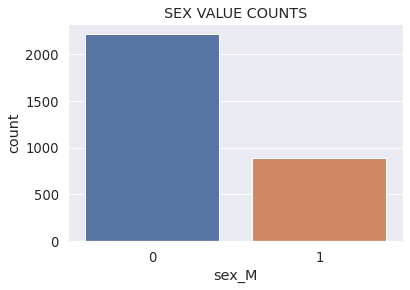

In [30]:
# A count plot on Sex
# count plot on single categorical variable
sns.countplot(x ='sex_M', data = df_hp)

# Show the plot
plt.title("SEX VALUE COUNTS")
plt.show()

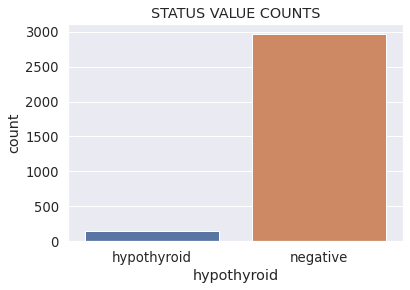

In [31]:
# A count plot on status
# count plot on single categorical variable
sns.countplot(x ='hypothyroid', data = df_hp)

plt.title("STATUS VALUE COUNTS")
# Show the plot
plt.show()

# Feature Engineering.

<h4>While performing feature engineering, we would apply some fundamental concepts to our dataset which have been described below: </h4>

<h3>Concept 1: Feature Selection</h3>
<p>
    This would involve identifying and removing unneeded, irrelevant and redundant attributes from data. 
    We would estimate the usefulness of our features by allocating and ranking features by their scores in terms of impact on our model. Features with the highest scores are selected for inclusion in the training dataset, whereas the rest are ignored. 
    A feature may be important if it is highly correlated with the dependent variable. To identify highly correlated features, we can also refer to reports from models on the variable importance. This is determined during the modeling preparation process.
</p>


## Feature Selection

In [32]:
df_hp.columns.tolist()

['hypothyroid',
 'age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'sex_M',
 'on_thyroxine_t',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_t',
 'thyroid_surgery_t',
 'query_hypothyroid_t',
 'query_hyperthyroid_t',
 'pregnant_t',
 'sick_t',
 'tumor_t',
 'lithium_t',
 'goitre_t',
 'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y']

In [33]:
def extra_tree_classifier(X_list,y_list):
    """
        [https://www.analyticsvidhya.com/blog/2021/04/discovering-the-shades-of-feature-selection-methods/]
    """
    X = df_hp[X_list]
    y = df_hp[y_list]

    from sklearn.ensemble import ExtraTreesClassifier

    model = ExtraTreesClassifier()

    model.fit(X,y)

    model_import = model.feature_importances_
    print(model_import)
    feat_imp = pd.Series(model.feature_importances_, index=X.columns)

    feat_imp.nlargest(13).plot.bar()
    plt.show()



In [34]:
a = ['age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'sex_M',
 'on_thyroxine_t',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_t',
 'thyroid_surgery_t',
 'query_hypothyroid_t',
 'query_hyperthyroid_t',
 'pregnant_t',
 'sick_t',
 'tumor_t',
 'lithium_t',
 'goitre_t',
 'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y']

b =['hypothyroid']

/home/eliud_luda/anaconda3/envs/ds_ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


[4.75144663e-02 2.97668635e-01 7.12780953e-02 2.28744416e-01
 5.70324947e-02 2.12148338e-01 9.93234896e-03 1.07685459e-02
 5.71599671e-04 4.90555539e-03 5.55151929e-03 1.22116738e-02
 5.14979426e-03 1.21064805e-03 5.66181568e-03 3.55521666e-04
 6.21737738e-05 4.05706481e-03 7.29822225e-03 8.22047507e-03
 8.98515681e-04 1.30427402e-03 7.72525745e-04 6.68128059e-03]


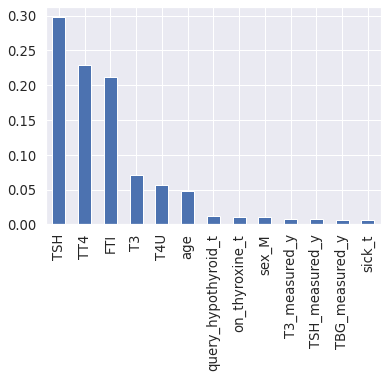

In [35]:
extra_tree_classifier(a,b)

In [36]:
# create new dataframe from selected columns
df_new = df_hp[['age','TSH','T3','TT4','T4U','FTI','hypothyroid']]

In [37]:
df_new.head()

,age,TSH,T3,TT4,T4U,FTI,hypothyroid
0,15,145.0,1.7,19.0,1.13,17,hypothyroid
1,24,0.0,0.2,4.0,1.00,0,hypothyroid
2,24,430.0,0.4,6.0,1.04,6,hypothyroid
3,77,7.3,1.2,57.0,1.28,44,hypothyroid
4,85,138.0,1.1,27.0,1.19,23,hypothyroid


In [38]:
df_new.dtypes

age              int64
TSH            float64
T3             float64
TT4            float64
T4U            float64
FTI             object
hypothyroid     object
dtype: object

In [39]:
df_new['FTI'] = df_new['FTI'].astype(float)

/home/eliud_luda/anaconda3/envs/ds_ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_new.dtypes


age              int64
TSH            float64
T3             float64
TT4            float64
T4U            float64
FTI            float64
hypothyroid     object
dtype: object

In [63]:
df_new.head()

,age,TSH,T3,TT4,T4U,FTI,hypothyroid
0,15,145.0,1.7,19.0,1.13,17.0,hypothyroid
1,24,0.0,0.2,4.0,1.00,0.0,hypothyroid
2,24,430.0,0.4,6.0,1.04,6.0,hypothyroid
3,77,7.3,1.2,57.0,1.28,44.0,hypothyroid
4,85,138.0,1.1,27.0,1.19,23.0,hypothyroid


## Cluster diagram

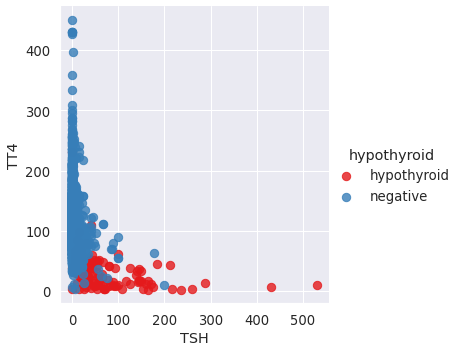

In [41]:
sns.lmplot(x='TSH',y='TT4', data=df_new, hue='hypothyroid',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

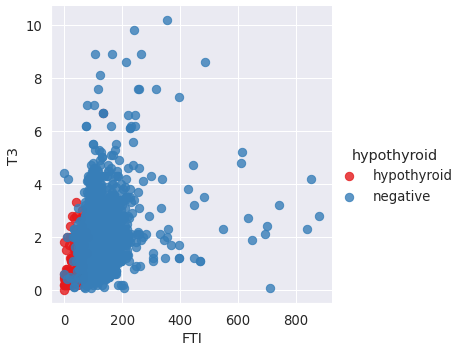

In [42]:
sns.lmplot(x='FTI',y='T3', data=df_new, hue='hypothyroid',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

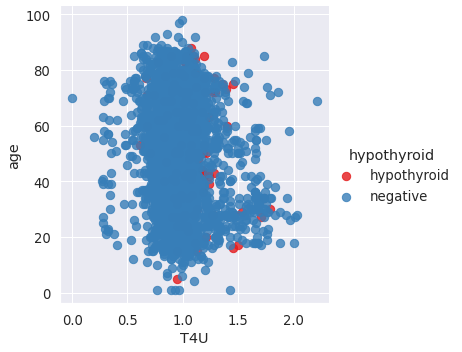

In [43]:
sns.lmplot(x='T4U',y='age', data=df_new, hue='hypothyroid',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

# Model Building and Testing.

## our problem is a classification problem on whether someone has 

# SVM:

In [44]:
# Specify the input for the model

X = df_new[['age','TSH','T3','TT4','T4U','FTI']].values
# Put a label of either a muffin or not and assign it 0 or 1
type_label = np.where(df_new['hypothyroid']=='hypothyroid',0,1)

In [45]:
type_label

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, type_label, test_size = 0.2, random_state = 0)
y_test.shape

(621,)

## Prediction and Evaluation:

In [47]:
X_test

array([[ 24.  ,   0.9 ,   1.7 ,  86.  ,   0.93,  92.  ],
       [ 76.  ,   3.2 ,   0.8 , 101.  ,   0.99, 103.  ],
       [ 72.  ,   1.3 ,   1.5 ,  58.  ,   0.53, 109.  ],
       ...,
       [ 60.  ,   4.  ,   1.9 ,  78.  ,   0.91,  86.  ],
       [ 44.  ,   0.3 ,   1.5 ,  94.  ,   1.07,  88.  ],
       [ 32.  ,   0.  ,   2.3 , 117.  ,   0.92, 127.  ]])

In [48]:
# Let's now build the svm model 
hypothyroid_model = SVC(kernel = 'linear')
# Train the model using the training set
hypothyroid_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = hypothyroid_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Perfomance and Evaluation:


In [49]:
# Now that we have trained our model, let's test how well it can predict the hypothyroid of a patient

# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)

print({
    "Model Accuracy": model_accuracy
})

# We've gotten a classification rate of 98.5%. This is a pretty good accuracy score 

# For further evaluation you can also check the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

{'Model Accuracy': 0.9855072463768116}


array([[ 19,   6],
       [  3, 593]])

## Deployment

In [50]:
import pickle

In [51]:
pickle.dump(hypothyroid_model, open("hypothyroid_model.pkl","wb"))

In [53]:
# if you want to test the model

h_model = pickle.load(open('hypothyroid_model.pkl','rb'))

In [59]:
test = [75,   1.9 ,   1.7 ,  45  ,   1.3,  92]

In [60]:
final_features = [np.array(test)]

prediction = h_model.predict(final_features)

In [61]:
prediction

array([1])

In [62]:
if prediction == 1:
    print("NO hypothyroid predicted")

NO hypothyroid predicted
